# Nima Vahdat 610397163

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl 

#from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

### Importing and checking dataset info

In [2]:
df = pd.read_csv("updated_bijankhan_corpus.csv")
df.head()

,Unnamed: 0,token,pos_tag,ezafe_tag
0,0,!هنری!,SUBJ,0
1,1,#,DELM,0
2,2,مسعود,N_SING_PR,1
3,3,شجاعی,N_SING_PR,1
4,4,طباطبایی,N_SING_PR,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602536 entries, 0 to 2602535
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   token       object
 2   pos_tag     object
 3   ezafe_tag   int64 
dtypes: int64(2), object(2)
memory usage: 79.4+ MB


## Adding new features

Now we need to add some features that we think they might be useful for classification

####  Length

In [4]:
df['length'] = df['token'].apply(len)

#### Next Token
We need to handle the Nan data for the last row because we are shifting one column one row up

In [5]:
df['next_token'] = df['token'].shift(periods=-1)
df['next_token'].iloc[-1] = str(" ")

/Users/nima/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Next Position Tag
We need to handle the Nan data for the last row because we are shifting one column one row up

In [6]:
df['next_pos_tag'] = df['pos_tag'].shift(periods=-1)
df['next_pos_tag'].iloc[-1] = 'DELM'

#### Alphabet
Additionally, we wish to add two new features for displaying the last alphabet of each token and the first alphabet of next token
* l_token
* f_next_token

To do that we need to define two functions that return the first and the last alphabet of each token

In [7]:
# Returns first alphabet
def first_alphabet(token):
    return token[0]

# Returns last alphabet
def last_alphabet(token):
    return token[-1]

In [8]:
df['l_token'] = df['token'].apply(last_alphabet)
df['f_next_token'] = df['next_token'].apply(first_alphabet)

Now let's check our dataframe one more time

In [9]:
df.head()

,Unnamed: 0,token,pos_tag,ezafe_tag,length,next_token,next_pos_tag,l_token,f_next_token
0,0,!هنری!,SUBJ,0,6,#,DELM,!,#
1,1,#,DELM,0,1,مسعود,N_SING_PR,#,م
2,2,مسعود,N_SING_PR,1,5,شجاعی,N_SING_PR,د,ش
3,3,شجاعی,N_SING_PR,1,5,طباطبایی,N_SING_PR,ی,ط
4,4,طباطبایی,N_SING_PR,0,8,#,DELM,ی,#


## Handling Categorical data

Some of these features are categorical, so we have to handle them accordingly

In [10]:
labelencoder = LabelEncoder()
df['pos_tag'] = labelencoder.fit_transform(df['pos_tag'])
df['next_pos_tag'] = labelencoder.fit_transform(df['next_pos_tag'])

df['token'] = labelencoder.fit_transform(df['token'])
df['next_token'] = labelencoder.fit_transform(df['next_token'])

df['l_token'] = labelencoder.fit_transform(df['l_token'])
df['f_next_token'] = labelencoder.fit_transform(df['f_next_token'])

# Visualisation on data

For the next step, we visualise the features and check their dependence to see if they are actually useful for classification

### Length

<AxesSubplot:ylabel='Frequency'>

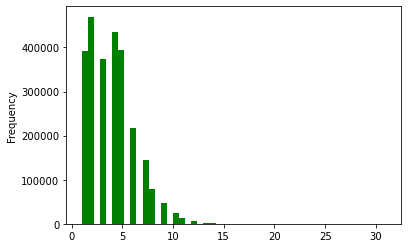

In [11]:
df['length'].plot(kind = 'hist' , bins = 50, color = 'green') 

Text(0.5, 0.98, 'Length via each ezafe')

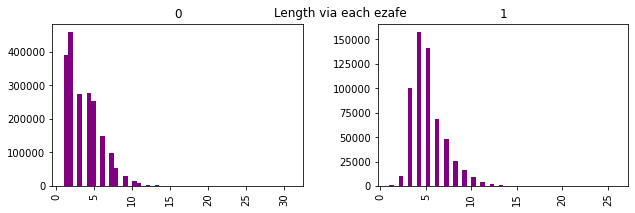

In [12]:
ax = df.hist(column = 'length', by = 'ezafe_tag', bins = 50 , figsize = (10, 3), color = 'purple');
pl.suptitle('Length via each ezafe')

### Position Tag

<AxesSubplot:ylabel='Frequency'>

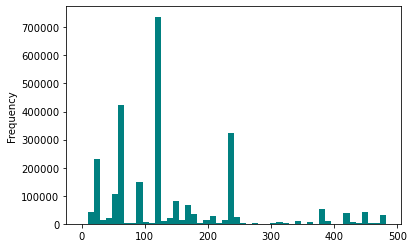

In [13]:
df['pos_tag'].plot(kind = 'hist' , bins = 50, color = 'teal') 

Text(0.5, 0.98, 'Position Tag via each ezafe')

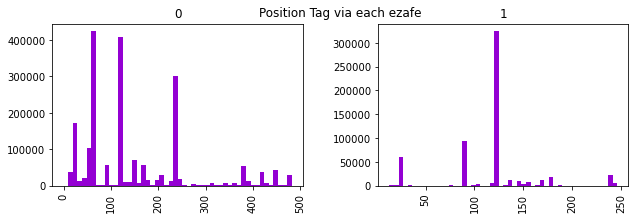

In [14]:
ax = df.hist(column = 'pos_tag', by = 'ezafe_tag', bins = 50 , figsize = (10, 3), color = 'darkviolet');
pl.suptitle('Position Tag via each ezafe')

### Next Position Tag

<AxesSubplot:ylabel='Frequency'>

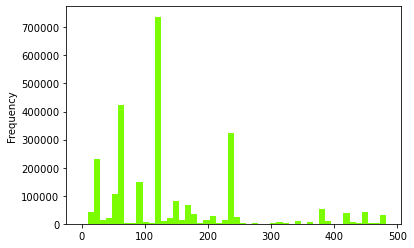

In [15]:
df['next_pos_tag'].plot(kind = 'hist' , bins = 50, color = 'lawngreen') 

Text(0.5, 0.98, 'Next Position Tag via each ezafe')

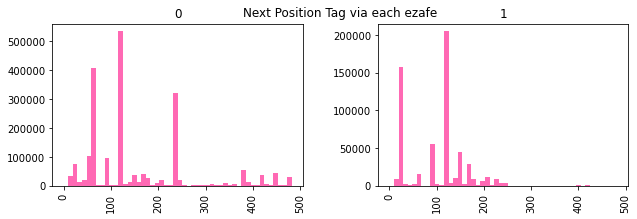

In [16]:
ax = df.hist(column = 'next_pos_tag', by = 'ezafe_tag', bins = 50 , figsize = (10, 3), color = 'hotpink');
pl.suptitle('Next Position Tag via each ezafe')

### Token

<AxesSubplot:ylabel='Frequency'>

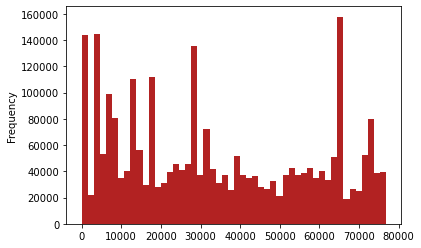

In [17]:
df['token'].plot(kind = 'hist' , bins = 50, color = 'firebrick') 

Text(0.5, 0.98, 'Token via each ezafe')

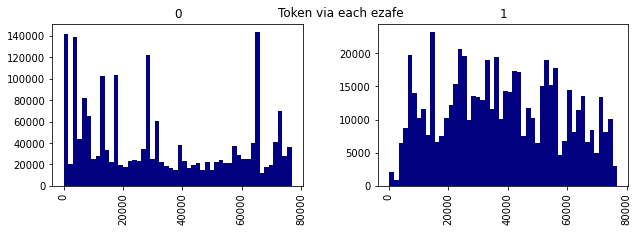

In [18]:
ax = df.hist(column = 'token', by = 'ezafe_tag', bins = 50 , figsize = (10, 3), color = 'navy');
pl.suptitle('Token via each ezafe')

### Next token

<AxesSubplot:ylabel='Frequency'>

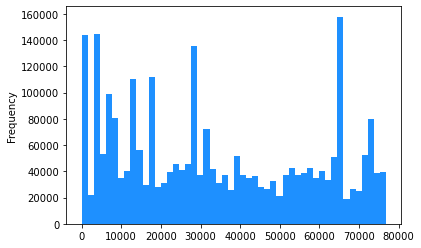

In [19]:
df['next_token'].plot(kind = 'hist' , bins = 50, color = 'dodgerblue') 

Text(0.5, 0.98, 'Next Token via each ezafe')

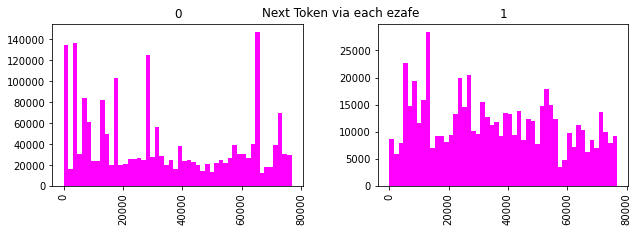

In [20]:
ax = df.hist(column = 'next_token', by = 'ezafe_tag', bins = 50 , figsize = (10, 3), color = 'magenta');
pl.suptitle('Next Token via each ezafe')

### Other features

Text(0.5, 0.98, 'First alphabet of the next Token via each ezafe')

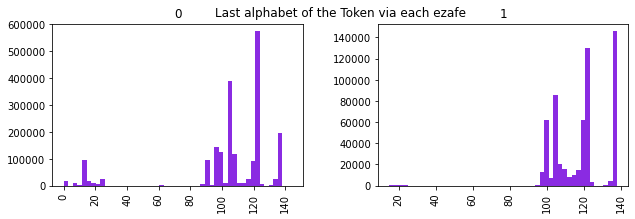

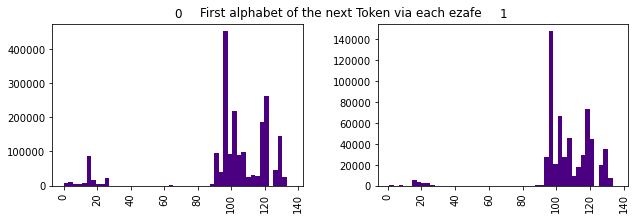

In [21]:
ax = df.hist(column = 'l_token', by = 'ezafe_tag', bins = 50 , figsize = (10, 3), color = 'blueviolet');
pl.suptitle('Last alphabet of the Token via each ezafe')

ax = df.hist(column = 'f_next_token', by = 'ezafe_tag', bins = 50 , figsize = (10, 3), color = 'indigo');
pl.suptitle('First alphabet of the next Token via each ezafe')

## Model

### Spliting Dataset

In [22]:
X = df[['next_pos_tag', 'pos_tag', 'token', 'next_token', 'length', 'f_next_token', 'l_token']]
y = df['ezafe_tag']


# Spliting Dateset into test and train
split = 10**5

X_train = X.iloc[:-split]
X_test = X.iloc[-split:]
y_train = y.iloc[:-split]
y_test = y.iloc[-split:]

## Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Fiting data into model
clf.fit(X_train, y_train)

# Predicting on test data
y_predict = clf.predict(X_test)

### Evaluation

In [24]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Percision:", precision_score(y_test, y_predict))

Accuracy: 0.75655
Percision: 0.5033984600336084


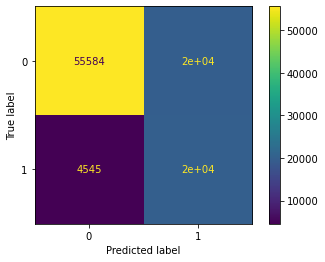

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## Decision Tree

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

# Fiting data into model
clf.fit(X_train, y_train)

# Predicting on test data
y_predict = clf.predict(X_test)

### Evaluation

In [38]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Percision:", precision_score(y_test, y_predict))

Accuracy: 0.96556
Percision: 0.9380897202449926


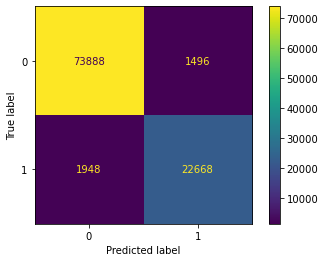

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()